# Simulation eines Abstandssensors mit linearer Kennlinie

## Erzeugen von Zufallszahlen

In [1]:
# pip install numpy
# conda install numpy

In [2]:
import numpy

In [3]:
A = numpy.random.normal(loc=3, scale=1.0, size=10000)

In [4]:
A

array([1.71988739, 3.88094065, 2.52953365, ..., 1.62210262, 3.96759583,
       3.84062618])

In [5]:
# pip install matplotlib
# conda install matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
numpy.mean(A)

2.9900943540542158

In [8]:
numpy.std(A)

0.9948955179331175

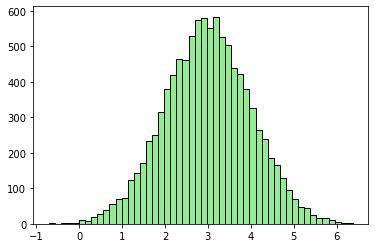

In [9]:
r = plt.hist(A, bins=50, edgecolor="black", color="lightgreen")
plt.show()

In [10]:
r

(array([  2.,   0.,   1.,   1.,   2.,  10.,   9.,  20.,  28.,  38.,  56.,
         69.,  72., 123., 144., 172., 233., 250., 315., 380., 420., 463.,
        462., 530., 575., 580., 551., 583., 527., 504., 439., 422., 380.,
        327., 263., 239., 186., 165., 128.,  96.,  69.,  48.,  44.,  26.,
         16.,  15.,  10.,   4.,   1.,   2.]),
 array([-7.15402420e-01, -5.73479889e-01, -4.31557359e-01, -2.89634828e-01,
        -1.47712298e-01, -5.78976724e-03,  1.36132763e-01,  2.78055294e-01,
         4.19977824e-01,  5.61900355e-01,  7.03822885e-01,  8.45745416e-01,
         9.87667946e-01,  1.12959048e+00,  1.27151301e+00,  1.41343554e+00,
         1.55535807e+00,  1.69728060e+00,  1.83920313e+00,  1.98112566e+00,
         2.12304819e+00,  2.26497072e+00,  2.40689325e+00,  2.54881578e+00,
         2.69073831e+00,  2.83266084e+00,  2.97458337e+00,  3.11650590e+00,
         3.25842843e+00,  3.40035096e+00,  3.54227349e+00,  3.68419603e+00,
         3.82611856e+00,  3.96804109e+00,  4.10996

## Eine Sensorklasse

In [11]:
class sensor_lineare_kennlinie:
    
    def __init__(self, bias, noise):
        self.bias = bias
        self.noise = noise
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise)
        return sensorwert
    
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,101):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()

In [12]:
s1 = sensor_lineare_kennlinie(-20, 1.0)

In [13]:
s1.get_sensorwert(100)

81.41524429131627

In [14]:
s2 = sensor_lineare_kennlinie(-5, 3.0)

In [15]:
s2.get_sensorwert(100)

86.41116487130853

## Sensorkurven

In [16]:
sensorwerte = []
for e in range(0,101):
    sensorwert = s1.get_sensorwert(e)
    sensorwerte.append( sensorwert )

In [17]:
len(sensorwerte)

101

In [18]:
sensorwerte[0:5]

[-18.709887026396093,
 -18.169472556055226,
 -17.392711744680867,
 -17.69769980482253,
 -16.352588444651225]

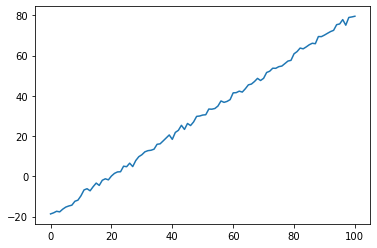

In [19]:
plt.plot(sensorwerte)
plt.show()

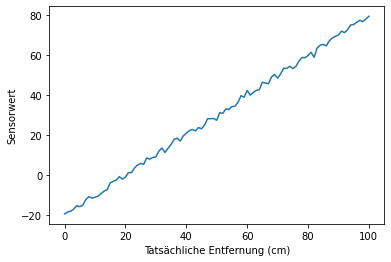

In [20]:
s1.zeige_sensor_kurve()

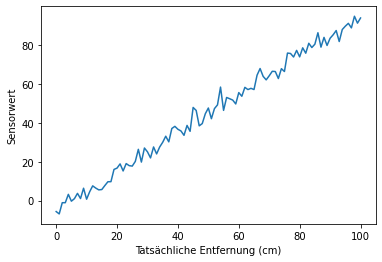

In [21]:
s2.zeige_sensor_kurve()

# Erste Fusionsansätze

## Fehlerfunktion für Fusionsergebnisse

In [22]:
gw = numpy.array([1,2,3,4,5]) # gw=Grundwahrheit, gt=Ground Truth
fusionsergebnisse = numpy.array([1.1, 2.2, 2.9, 4.05, 5.9])

In [23]:
gw

array([1, 2, 3, 4, 5])

In [24]:
fusionsergebnisse

array([1.1 , 2.2 , 2.9 , 4.05, 5.9 ])

In [25]:
gw - fusionsergebnisse

array([-0.1 , -0.2 ,  0.1 , -0.05, -0.9 ])

In [26]:
numpy.mean(abs(gw - fusionsergebnisse))

0.27000000000000013

In [65]:
def MAE(gw, fusionsergebnisse):
    return numpy.mean( abs(numpy.array(gw) - numpy.array(fusionsergebnisse)) )

In [28]:
MAE(gw, fusionsergebnisse)

0.27000000000000013

In [29]:
%who

A	 MAE	 e	 fusionsergebnisse	 gw	 numpy	 plt	 r	 s1	 
s2	 sensor_lineare_kennlinie	 sensorwert	 sensorwerte	 


In [30]:
%whos

Variable                   Type                        Data/Info
----------------------------------------------------------------
A                          ndarray                     10000: 10000 elems, type `float64`, 80000 bytes
MAE                        function                    <function MAE at 0x7fa24fc825e0>
e                          int                         100
fusionsergebnisse          ndarray                     5: 5 elems, type `float64`, 40 bytes
gw                         ndarray                     5: 5 elems, type `int64`, 40 bytes
numpy                      module                      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                        module                      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r                          tuple                       n=3
s1                         sensor_lineare_kennlinie    <__main__.sensor_lineare_<...>object at 0x7fa24fd20af0>
s2                         sensor_lineare_kenn

## Auswertung für Sensor 1 und Sensor 2

In [31]:
def erzeuge_messreihe(s,N):
    
    gw = []
    sensorwerte = []
    
    for e in range(0,N):
        sensorwert = s.get_sensorwert(e)
        gw.append(e)
        sensorwerte.append( sensorwert )
        
    return numpy.array(gw), numpy.array(sensorwerte)

In [32]:
gw, sensorwerte = erzeuge_messreihe(s1, 1000)
MAE(gw, sensorwerte)

20.03467402980649

In [33]:
gw[0:5]

array([0, 1, 2, 3, 4])

In [34]:
sensorwerte[0:5]

array([-19.26446804, -19.73249572, -19.08237108, -16.5957158 ,
       -16.63115568])

In [35]:
gw, sensorwerte = erzeuge_messreihe(s2, 1000)
MAE(gw, sensorwerte)

5.210534606696321

## Sensorfusion über eine einfache Mittelwertbildung

In [36]:
gw, sensorwerte1 = erzeuge_messreihe(s1, 1000)
gw, sensorwerte2 = erzeuge_messreihe(s2, 1000)

In [37]:
sensorwerte1[0:5]

array([-20.65057047, -18.82007926, -18.30154404, -17.03439132,
       -17.09166336])

In [38]:
sensorwerte2[0:5]

array([-1.22403009, -6.99722754, -3.6031111 , -2.57355481, -3.79575142])

In [39]:
fusionsergebnisse = (sensorwerte1+sensorwerte2) / 2

In [40]:
type(fusionsergebnisse)

numpy.ndarray

In [41]:
fusionsergebnisse[0:5]

array([-10.93730028, -12.9086534 , -10.95232757,  -9.80397307,
       -10.44370739])

In [42]:
MAE(gw, fusionsergebnisse)

12.466626266429186

**Fazit: Eine einfache Mittelwertbildung bringt es nicht!**

## Sensorfusion mit Biaskorrektur und Mittelwertbildung

In [43]:
def ME(gw, fusionsergebnisse):
    return numpy.mean(gw - fusionsergebnisse)

In [44]:
bias1 = ME(gw, sensorwerte1)
bias1

19.990786660015974

In [45]:
bias2 = ME(gw, sensorwerte2)
bias2

4.9424658728424005

In [46]:
fusionsergebnisse2 = ((sensorwerte1+bias1) + (sensorwerte2+bias2)) / 2

In [47]:
fusionsergebnisse2[0:5]

array([ 1.52932599, -0.44202713,  1.51429869,  2.6626532 ,  2.02291887])

In [48]:
MAE(gw, fusionsergebnisse2)

1.2379607250304256

Ohne Mittelwerbildung? Nur Verwenden der Sensordaten von Sensor 1 oder Sensor 2?

In [49]:
fusionsergebnisse3 = sensorwerte1+bias1

In [50]:
MAE(gw, fusionsergebnisse3)

0.7856962120689377

In [51]:
fusionsergebnisse4 = sensorwerte2+bias2

In [52]:
MAE(gw, fusionsergebnisse4)

2.3477500627271293

# Simulation eines Abstandssensors mit nicht-linearer Kennlinie

## Der Logarithmus ist eine nicht-lineare Funktion

In [53]:
x = numpy.arange(1,1001)

In [54]:
x[:100]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [55]:
y = numpy.log(x)

In [56]:
y[:100]

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

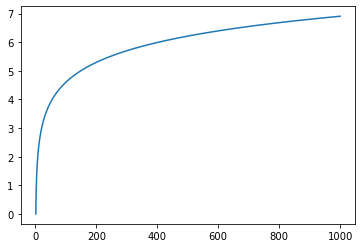

In [57]:
plt.plot(x,y)
#plt.scatter(x,y, marker="<")
plt.show()

## Eine neue Sensor-Klasse

In [58]:
class sensor_nichtlineare_kennlinie:
    
    def __init__(self, bias, noise):
        self.bias = bias
        self.noise = noise
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise) + 500*numpy.log(1+e)
        return sensorwert
    
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()

In [59]:
s3 = sensor_nichtlineare_kennlinie(50,40)

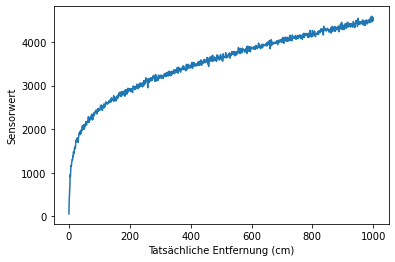

In [60]:
s3.zeige_sensor_kurve()

In [61]:
s4 = sensor_nichtlineare_kennlinie(-100,80)

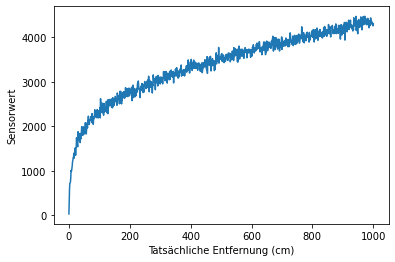

In [62]:
s4.zeige_sensor_kurve()

In [63]:
s4.get_sensorwert(60)

2098.5466511427867

# Neuer Fusionsansatz über Inverse Sensormodelle

## Inverses Sensormodell (ISM)

In [64]:
# Aufbauen einer LUT (Look-Up-Table):
# Sensorwert -> Entfernung (ISM)

ism_s4 = {}

for e in range(0,1001):

    sensorwerte = []
    for run in range(0,50):        
        sensorwert = s4.get_sensorwert( e )
        sensorwerte.append( sensorwert )
        
    mittlerer_sensorwert = numpy.mean( sensorwerte )
    
    ism_s4[mittlerer_sensorwert] = e

In [65]:
type(ism_s4)

dict

In [66]:
gw = [ism_s4[key] for key in ism_s4]
messwerte = [key for key in ism_s4]

In [67]:
gw[:5]

[0, 1, 2, 3, 4]

In [68]:
messwerte[:5]

[-89.85709929291754,
 255.8202783214394,
 451.92132095203664,
 598.736996386553,
 693.5723260299109]

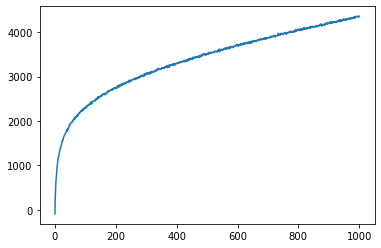

In [69]:
plt.plot(gw, messwerte)
plt.show()

In [70]:
# Suche nach einem ähnlichen Sensorwert in der LUT
sensorwert = 399
min_dist = None
best_key = None

for key in ism_s4:
    dist = abs(sensorwert - key)
    if best_key == None or dist < min_dist:
        best_key = key
        min_dist = dist

In [71]:
best_key

451.92132095203664

In [72]:
class ism:
    
    def __init__(self, s):
        self.sensor = s
        
    def baue_lut_auf(self):
        
        self.lut = {}
        for e in range(0,1001):

            sensorwerte = []
            for run in range(0,50):        
                sensorwert = self.sensor.get_sensorwert( e )
                sensorwerte.append( sensorwert )

            mittlerer_sensorwert = numpy.mean( sensorwerte )

            self.lut[mittlerer_sensorwert] = e
            
            
    def sensorwert_zu_entfernung(self, sensorwert):
        min_dist = None
        best_key = None

        for key in self.lut:
            dist = abs(sensorwert - key)
            if best_key == None or dist < min_dist:
                best_key = key
                min_dist = dist
                
        beste_entfernungs_schaetzung = self.lut[best_key]
        return beste_entfernungs_schaetzung

In [73]:
ism_s4 = ism(s4)

In [74]:
type(ism_s4)

__main__.ism

In [75]:
ism_s4.baue_lut_auf()

In [76]:
ein_sensorwert = s4.get_sensorwert(500)
ein_sensorwert

3412.289425493827

In [77]:
ism_s4.sensorwert_zu_entfernung( ein_sensorwert )

455

## Sensordatenfusion über inverse Sensormodelle

In [78]:
s3 = sensor_nichtlineare_kennlinie(50,5)
s4 = sensor_nichtlineare_kennlinie(-100,20)

ism_s3 = ism(s3)
ism_s3.baue_lut_auf()

ism_s4 = ism(s4)
ism_s4.baue_lut_auf()

In [79]:
gw = []
fusions_ergebnisse = []

for e in range(0,1001):
    sensorwert_s3 = s3.get_sensorwert(e)
    sensorwert_s4 = s4.get_sensorwert(e)
    
    entfernungs_schaetzung_s3 = ism_s3.sensorwert_zu_entfernung( sensorwert_s3 )
    entfernungs_schaetzung_s4 = ism_s4.sensorwert_zu_entfernung( sensorwert_s4 )
    
    # Fall Nr 1.: Nur Sensor 3
    fusionierte_finale_entfernungs_schaetzung = entfernungs_schaetzung_s3
    
    # Fall Nr 2.: Nur Sensor 4
    #fusionierte_finale_entfernungs_schaetzung = entfernungs_schaetzung_s4
    
    # Fall Nr 3. Mittelwertbildung von Sensor 3 und Sensor 4
    # fusionierte_finale_entfernungs_schaetzung = (entfernungs_schaetzung_s3 + entfernungs_schaetzung_s4) / 2
    
    gw.append(e)
    fusions_ergebnisse.append( fusionierte_finale_entfernungs_schaetzung )

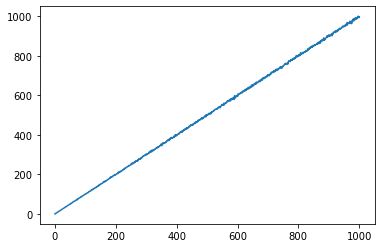

In [80]:
plt.plot(gw, fusions_ergebnisse)
plt.show()

In [81]:
MAE(gw, fusions_ergebnisse)

1.7382617382617382

| Fusionsart  | Ergebnis / MAE [cm] |
| ----------- | ----------- |
| Nur Sensor3 | 1.78        |
| Nur Sensor4 | 7.23        |
| Mittelung   | 3.72        |

**Fazit: Auch hier ist die Mittelwertbildung nicht hilfreich!**

# Simulation eines komplexeren Abstandssensors

## Komplexere Kennlinie erzeugen

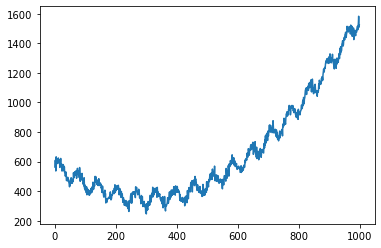

In [12]:
import matplotlib.pyplot as plt
import numpy
bias = -50
noise = 20
pos = 500
gw = []
sensorwerte = []
for e in range(0,1000):
    sensorwert = e + numpy.random.normal(loc=bias, scale=noise) + \
                 50*numpy.sin(e/10) + ((e-pos)/20)**2
    gw.append( e )
    sensorwerte.append( sensorwert )
plt.plot(gw,sensorwerte)
plt.show()

## Neue Sensorklasse

In [18]:
class sensor_complex:
    
    def __init__(self, bias, noise, pos):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise) + \
                    50*numpy.sin(e/10) + ((e-self.pos)/20)**2
        return sensorwert
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()       

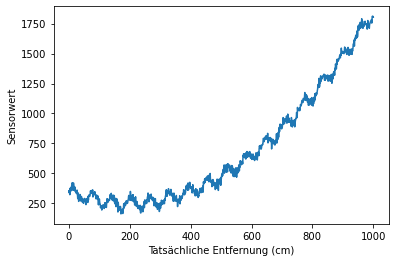

In [19]:
s5 = sensor_complex(-50,20,400)
s5.zeige_sensor_kurve()

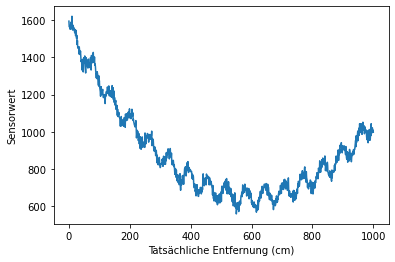

In [20]:
s6 = sensor_complex(-50,20,800)
s6.zeige_sensor_kurve()

In [17]:
%whos

Variable         Type              Data/Info
--------------------------------------------
bias             int               -50
e                int               999
gw               list              n=1000
noise            int               20
numpy            module            <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt              module            <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
pos              int               500
s5               sensor_complex    <__main__.sensor_complex <...>object at 0x7ff15f2a2c70>
s6               sensor_complex    <__main__.sensor_complex <...>object at 0x7ff15ef75550>
s7               sensor_complex    <__main__.sensor_complex <...>object at 0x7ff15f7c4d30>
sensor_complex   type              <class '__main__.sensor_complex'>
sensorwert       float64           1525.7210583795027
sensorwerte      list              n=1000


# Eine lernende Sensordatenfusion

## Vorbereiten der Beispieldaten fürs Machine Learning

In [35]:
NR_EXAMPLE_DATA = 5000
X = numpy.zeros( (NR_EXAMPLE_DATA,2) )
Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

for run in range(0,NR_EXAMPLE_DATA):
    e = numpy.random.randint(low=0, high=1000)
    sensorwert_s5 = s5.get_sensorwert(e)
    sensorwert_s6 = s6.get_sensorwert(e)
    
    X[run,:] = numpy.array( [sensorwert_s5, sensorwert_s6] )
    Y[run,:] = e

In [36]:
X[:5]

array([[ 227.92514233,  883.9374075 ],
       [1111.89365231,  681.39675468],
       [ 315.69934996, 1016.5567372 ],
       [ 424.3865414 ,  620.04043026],
       [ 181.84253076, 1059.1150154 ]])

In [37]:
Y[:5]

array([[238.],
       [798.],
       [261.],
       [489.],
       [166.]])

## Beispieldaten aufspalten in Trainingsdaten- und Testdaten

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
x_train.shape

(4000, 2)

In [45]:
y_train

array([[ 90.],
       [480.],
       [182.],
       ...,
       [731.],
       [611.],
       [620.]])

In [46]:
print( x_train[0], "-->", y_train[0] )

[ 277.49816758 1315.57472435] --> [90.]


In [47]:
x_test.shape

(1000, 2)

In [48]:
y_test.shape

(1000, 1)

## Machine Learning mittels scikit-learn

In [86]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3, weights="uniform")


#from sklearn import tree
#model = tree.DecisionTreeRegressor()

model = model.fit(x_train, y_train)

## Testen der Modellgüte

In [87]:
input_vec = numpy.array( [214.92514233,  890.9374075] )
input_vec

array([214.92514233, 890.9374075 ])

In [88]:
type(input_vec)

numpy.ndarray

In [89]:
input_vec.shape

(2,)

In [90]:
input_vec.ndim

1

In [91]:
input_vec.reshape((1,2))

array([[214.92514233, 890.9374075 ]])

In [92]:
model.predict( input_vec.reshape(1,2) )

array([[255.66666667]])

In [94]:
x_test.shape

(1000, 2)

In [95]:
y_test.shape

(1000, 1)

In [96]:
preds = model.predict( x_test )

In [97]:
preds[:10]

array([[360.66666667],
       [172.33333333],
       [512.33333333],
       [709.66666667],
       [ 23.        ],
       [479.66666667],
       [141.        ],
       [786.66666667],
       [178.        ],
       [201.        ]])

In [80]:
y_test[:10]

array([[359.],
       [183.],
       [507.],
       [705.],
       [ 30.],
       [502.],
       [138.],
       [800.],
       [190.],
       [204.]])

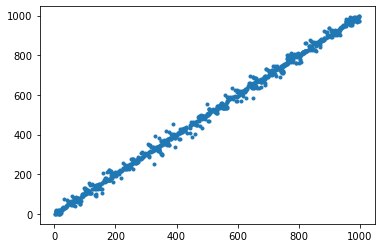

In [81]:
plt.scatter(y_test, preds, marker=".")
plt.show()

In [82]:
MAE(y_test, preds)

339.24971

In [83]:
text_representation = tree.export_text(model)

# Lernende Ansätze zur Sensordatenfusion bei unterschiedlichen Ranges

## Neue Sensorklasse mit Rangeangabe

In [98]:
class sensor_complex_range:
    
    def __init__(self, bias, noise, pos, fac):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        self.fac = fac
        
    def get_sensorwert(self, e):
        sensorwert = self.fac * (e + numpy.random.normal(loc=self.bias, scale=self.noise) + \
                    50*numpy.sin(e/10) + ((e-self.pos)/20)**2)
        return sensorwert
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()  

In [99]:
s7 = sensor_complex_range(-50,20,400,1)
s8 = sensor_complex_range(-50,20,800,100)

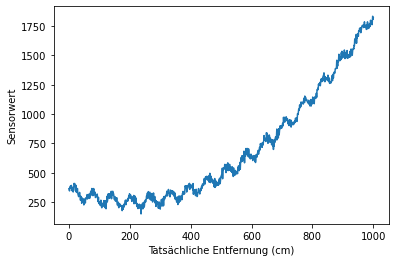

In [104]:
s7.zeige_sensor_kurve()

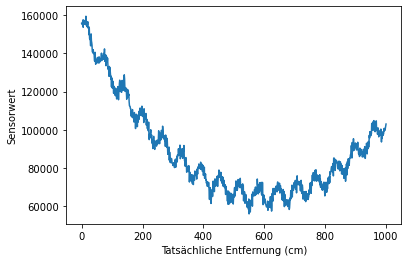

In [105]:
s8.zeige_sensor_kurve()

## Machine Learning Reloaded

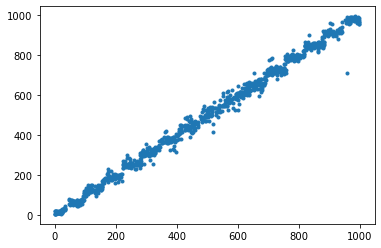

MAE= 15.905


In [111]:
# 1. Beispieldaten fürs ML vorbereiten
NR_EXAMPLE_DATA = 5000
X = numpy.zeros( (NR_EXAMPLE_DATA,2) )
Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

for run in range(0,NR_EXAMPLE_DATA):
    e = numpy.random.randint(low=0, high=1000)
    sensorwert_s7 = s7.get_sensorwert(e)
    sensorwert_s8 = s8.get_sensorwert(e)
    
    X[run,:] = numpy.array( [sensorwert_s7, sensorwert_s8] )
    Y[run,:] = e
    

# 2. Beispieldaten in Trainings- und Testdaten aufspalten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)


# 3. Model erlernen
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3, weights="uniform")
model = model.fit(x_train, y_train)

# 4. Modellgüte bestimmen
preds = model.predict( x_test )
plt.scatter(y_test, preds, marker=".")
plt.show()
print( "MAE=", MAE(y_test, preds) )

## Normalisierung

In [113]:
D = numpy.array( [[-20, -2],
                  [-10, -1],
                  [  0,  0],
                  [+10,+ 1]])

In [114]:
D

array([[-20,  -2],
       [-10,  -1],
       [  0,   0],
       [ 10,   1]])

In [122]:
numpy.mean( D[:,1] )

-0.5

In [123]:
numpy.std( D[:,1] )

1.118033988749895

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
D_scaled = scaler.fit_transform(D)

In [124]:
D_scaled

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [128]:
numpy.std( D_scaled[:,0] )

1.0